# Extracción de datos

Fuentes

Por medio de la API https://www.kaggle.com/  
    
Se obtiene la base de datos historica de vacunación contra COVID19 
    
Por medio del sitio https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico
    
Se obtiene la base de casos diarios historico de COVID 19 en México 

In [1]:
"""Importación de librerias"""

import kaggle ##API para descarga de dataset
import pandas as pd ##Transformación de informacion
import pyodbc ## Conexion a base de datos
import sqlalchemy ## Escritura en base de datos
from sqlalchemy import create_engine,event ## Creacion de motor para escritura en base de datos
import json ## Conexion API Kaggle por archivo Json

In [32]:
"""Generamos el Token para conexión a la API de Kaggle"""

token = {"username":"nancymarin","key":"46f42bf4b82142b89ba02d2086b38ab4"}
with open(r'C:\Users\nmarin\.kaggle/kaggle.json', 'w') as file:json.dump(token, file)


In [33]:
"""Listamos los dataset disponibles para el tema que queremos analizar, para este proyecto utilizamos la palabra 'COVID' """

!kaggle datasets list -s COVID


ref                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
imdevskp/corona-virus-report                       COVID-19 Dataset                                     19MB  2020-08-07 03:47:47         179154       1518  1.0              
sudalairajkumar/covid19-in-india                   COVID-19 in India                                   758KB  2021-08-11 04:14:10         145654       1721  0.9117647        
gpreda/covid-world-vaccination-progress            COVID-19 World Vaccination Progress                   2MB  2022-01-26 11:07:24          74506       1985  1.0              
roche-data-science-coalition/uncover               UNCOVER COVID-19 Challenge                          258MB  2021-10-31 00:0

In [38]:
"""Descargamos los datasets elegido para su analisis"""

!kaggle datasets download gpreda/covid-world-vaccination-progress


  0%|          | 0.00/1.66M [00:00<?, ?B/s]
 60%|######    | 1.00M/1.66M [00:00<00:00, 3.78MB/s]
100%|##########| 1.66M/1.66M [00:00<00:00, 6.23MB/s]


# Validacion de información


Se valida base con información de casos historico diarios COVID - 19

In [8]:
data_import_covid = pd.read_csv('C:\..\..\COVID.txt',encoding='latin-1', error_bad_lines=False,sep='|')

In [9]:
data_import_covid.shape

(8799076, 27)

In [69]:
data_import_covid.head()

,FECHA_INGRESO,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,id_day_vaccinations
0,2021-02-28,65974c,4,1,1,32,32,24,0,0,...,1,0,0,0,0,0,0,POSITIVO,2,67.0
1,2021-02-28,6cbf41,4,14,1,30,14,120,0,0,...,0,0,0,0,0,0,1,POSITIVO,2,67.0
2,2021-02-28,e60203,4,9,1,9,9,15,1,0,...,1,1,0,0,0,0,0,NEGATIVO,2,67.0
3,2021-02-28,71e68c,4,14,1,16,14,101,0,0,...,0,0,0,1,0,0,0,POSITIVO,2,67.0
4,2021-02-28,d5a8ea,10,9,1,16,9,2,0,0,...,1,0,0,0,0,0,0,POSITIVO,1,67.0


Se valida catalogos incluidos en la base para base COVID - 19

In [26]:
data_import_cat_genero = pd.read_csv('C:\..\..\GENERO.csv', infer_datetime_format=True)


In [27]:
data_import_cat_genero

,CLAVE,DESCRIPCION
0,1,MUJER
1,0,HOMBRE


In [28]:
data_import_cat_tipo_paciente = pd.read_csv('C:\..\..\TIPO_PACIENTE.csv', infer_datetime_format=True)

In [29]:
data_import_cat_tipo_paciente

,CLAVE,DESCRIPCION
0,1,AMBULATORIO
1,0,HOSPITALIZADO


Se valida base con información de vacunación diario contra COVID - 19

In [16]:
data_import_vacunación = pd.read_csv('C:\..\..\country_vaccinations.csv', parse_dates=[7], infer_datetime_format=True)

In [68]:
data_import_vacunación.head()

,country,iso_code,id_day_vaccinations,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Mexico,MEX,1,24/12/2020,2924,2924,0,0,0,0.00,0.00,0.0,0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
1,Mexico,MEX,2,25/12/2020,2924,2924,0,0,1300,0.00,0.00,0.0,10,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
2,Mexico,MEX,3,26/12/2020,2924,2924,0,0,1300,0.00,0.00,0.0,10,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
3,Mexico,MEX,4,27/12/2020,6824,6824,0,0,1300,0.01,0.01,0.0,10,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
4,Mexico,MEX,5,28/12/2020,9579,9579,0,2755,1664,0.01,0.01,0.0,13,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


# Creación de Base de datos SQL

Se Crea base de datos SQL en Google Cloud Pladform https://cloud.google.com/

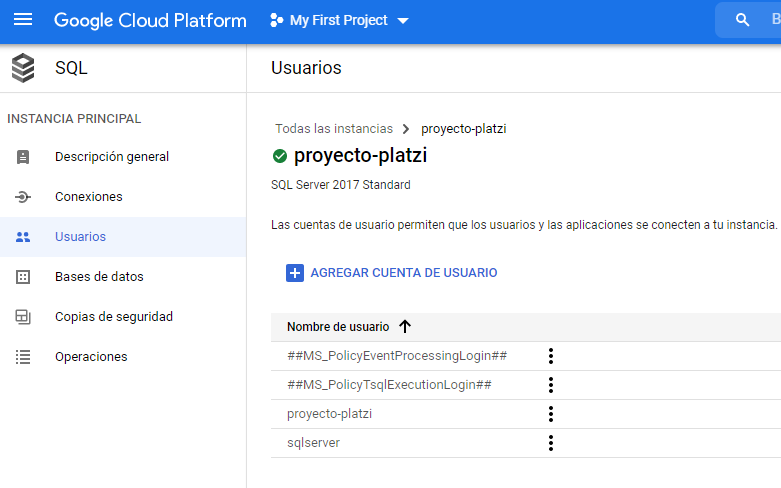

<h6>Creamos motor para establecer conexión a la base SQL

In [7]:
"""Validamos conexión a base"""

sql_engine = create_engine(sqlalchemy.engine.url.URL('mssql+pymssql', username='user',
                                                     password='password', host='host',
                                                     database='DB'))

conn = sql_engine.connect()


# Escritura en base SQL

Se realiza escritura en base sql para cada una de las tablas

In [31]:
data_import_cat_tipo_paciente = data_import_cat_tipo_paciente.head(len(data_import_covid.index))

data_import_cat_tipo_paciente.to_sql('catalogo_tipo_paciente',con=conn_2,index=False, if_exists = 'replace', method = 'multi',chunksize = 500)

print("escritura en DB exitosa")

escritura en DB exitosa


Realizamos consulta a base

In [66]:
covid= pd.read_sql("""SELECT 
       covid.FECHA_INGRESO, 
       covid.ID_REGISTRO, 
       covid.SECTOR, 
       covid.ENTIDAD_UM, 
       covid.ENTIDAD_NAC, 
       covid.ENTIDAD_RES,
       covid.MUNICIPIO_RES,
       covid.INTUBADO, 
       covid.NEUMONIA, 
       covid.EDAD,
       covid.EMBARAZO, 
       covid.DIABETES, 
       covid.EPOC, 
       covid.ASMA,
       covid.INMUSUPR, 
       covid.HIPERTENSION, 
       covid.OTRA_COM, 
       covid.CARDIOVASCULAR, 
       covid.OBESIDAD,
       covid.RENAL_CRONICA, 
       covid.TABAQUISMO, 
       covid.OTRO_CASO, 
       covid.CLASIFICACION_FINAL,
       covid.UCI, 
       covid.id_day_vaccinations,
       vacu.id_day_vaccinations,
       vacu.people_vaccinated,
       vacu.people_fully_vaccinated,
       vacu.people_vaccinated_per_hundred,
       vacu.people_fully_vaccinated_per_hundred,
       cat_p.DESCRIPCION as TIPO_PACIENTE,
       cat_g.DESCRIPCION as SEXO
    FROM 
       proyecto_platzi.dbo.hist_covidmx covid
    LEFT JOIN 
       proyecto_platzi.dbo.hist_vacunacionmx vacu
       ON  covid.id_day_vaccinations = vacu.id_day_vaccinations
    LEFT JOIN 
       proyecto_platzi.dbo.catalogo_genero cat_g
       ON  covid.SEXO = cat_g.CLAVE
    LEFT JOIN 
       proyecto_platzi.dbo.catalogo_tipo_paciente cat_p
       ON  covid.TIPO_PACIENTE = cat_p.CLAVE
       where covid.id_day_vaccinations < 70;""",conn)
        

In [70]:
covid.head()

,FECHA_INGRESO,ID_REGISTRO,SECTOR,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,INTUBADO,NEUMONIA,EDAD,...,CLASIFICACION_FINAL,UCI,id_day_vaccinations,id_day_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,TIPO_PACIENTE,SEXO
0,2021-02-28,65974c,4,1,32,32,24,0,0,64,...,POSITIVO,2,67.0,67,1889672,565423,1.45,0.43,HOSPITALIZADO,MUJER
1,2021-02-28,6cbf41,4,14,30,14,120,0,0,57,...,POSITIVO,2,67.0,67,1889672,565423,1.45,0.43,HOSPITALIZADO,MUJER
2,2021-02-28,e60203,4,9,9,9,15,0,0,72,...,NEGATIVO,2,67.0,67,1889672,565423,1.45,0.43,AMBULATORIO,MUJER
3,2021-02-28,71e68c,4,14,16,14,101,0,0,42,...,POSITIVO,2,67.0,67,1889672,565423,1.45,0.43,HOSPITALIZADO,MUJER
4,2021-02-28,d5a8ea,10,9,16,9,2,0,1,41,...,POSITIVO,1,67.0,67,1889672,565423,1.45,0.43,HOSPITALIZADO,MUJER


Una vez realizada la extracciín y escritura en base de datos SQL, continuamos con la transformación y analisis de la iniformación en un notebook diferente.